# Task 4: PCA

## Overview

In this task, you will apply **Principal Component Analysis (PCA)** to reduce the dimensionality of our **TF-IDF representation** and visualize the **K-Means clustering results** from Task 3. This will help us understand how well the documents are grouped into clusters.

## Why PCA for Visualization?

**Principal Component Analysis (PCA)** is a dimensionality reduction technique that:

1. Projects high-dimensional data into **2D space** while preserving as much information as possible.
2. Allows us to **visualize clusters** in a way that is easy to interpret.
3. Helps us analyze whether the **K-Means clustering** captured meaningful document groupings.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
def train_and_save_kmeans(k: int):
    # load tfdif train data
    X_train_tfidf = np.load('data/tfidf_train.npy')

    # generate kmeans model
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(X_train_tfidf)

    print("Training K-Means clustering with " + str(k) + " clusters")
    print("Clustering inertia:", kmeans.inertia_)

    return kmeans

In [3]:
def visualize_clusters_pca():
    optimal_k = 23 # obtained from task3
    
    # load tfdif train data
    X_train_tfidf = np.load('data/tfidf_train.npy')

    # pca to reduce the number of features for 2D plot
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train_tfidf)

    # actual cluster labels for the data, as per kmeans
    labels = train_and_save_kmeans(23).labels_

    plt.figure(figsize=(8, 6))

    # Scatter plot with x1, x2 as coordinates and color by the cluster labels
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=1)

    # Add title and labels
    plt.title('Data Classification using KMeans and PCA', fontsize=14)
    plt.xlabel('feature 1', fontsize=12)
    plt.ylabel('feature 2', fontsize=12)

    # Show the color bar to indicate the clusters
    plt.colorbar(label='Cluster Number')

    # Show the plot
    plt.savefig('output/cluster_visualization.png')

Training K-Means clustering with 23 clusters
Clustering inertia: 8537.316792591073


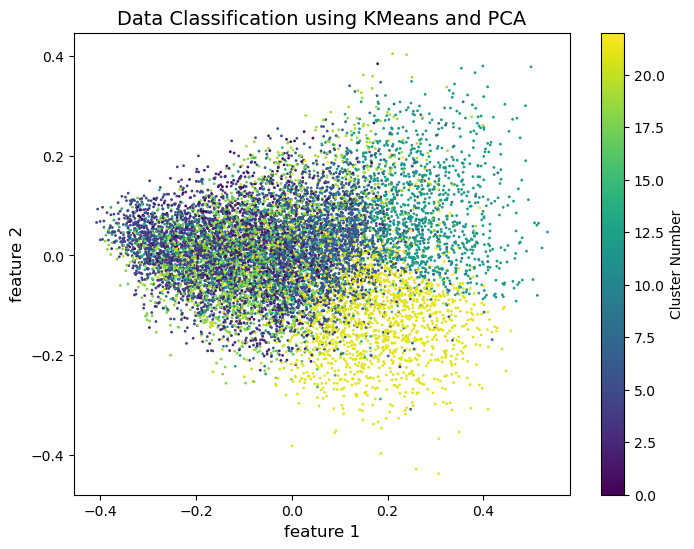

In [4]:
visualize_clusters_pca()

**Note:** We have reduced the dimension of the features. Hence the clusters are overlapping with actual features, they can be separated into 23 distinct clusters. But in practical, it is not possible to plot more than 2 or 3 features.